In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [5]:
# Normalize the data
def normalize_data(data, mean=None, std=None):
    if mean is None or std is None:
        mean = data.mean(axis=0)
        std = data.std(axis=0)
    return (data - mean) / std, mean, std

train_data, mean, std = normalize_data(train_data)
test_data, _, _ = normalize_data(test_data, mean, std)


In [7]:
# Build the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Linear output layer
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='mse',
                  metrics=['mae'])
    return model

In [9]:
# Train the model
model = build_model()
history = model.fit(train_data, train_targets, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

C:\Users\samik\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 304.1827 - mae: 13.6923 - val_loss: 24.3518 - val_mae: 3.7231
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.8082 - mae: 2.9497 - val_loss: 17.6836 - val_mae: 3.0822
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.2271 - mae: 2.9242 - val_loss: 17.2552 - val_mae: 2.9553
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.2708 - mae: 2.6882 - val_loss: 14.2904 - val_mae: 2.7116
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.4565 - mae: 2.3803 - val_loss: 14.1416 - val_mae: 2.8002
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.1184 - mae: 2.4601 - val_loss: 16.5829 - val_mae: 2.8255
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.8615 - mae: 2.7351 - val_loss: 17.2134 - val_mae: 3.2775
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.6901 - mae: 2.6322 - val_loss: 11.8080 - val_mae: 2.7142
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

In [10]:
# Evaluate the model
test_mse, test_mae = model.evaluate(test_data, test_targets, verbose=0)
print(f'Test MAE: {test_mae:.2f}')

Test MAE: 2.87


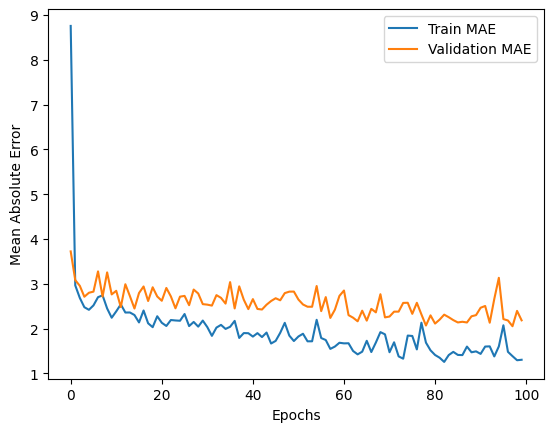

In [13]:
# Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [15]:
# Make predictions
predictions = model.predict(test_data)
print("Sample Predictions:", predictions[:5].flatten())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Sample Predictions: [ 8.521487 16.830984 19.86177  33.761513 23.023806]
